In [1]:
import sys 
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import mstats

In [4]:
min_temp = pd.read_excel('../../input/MinClimate.xlsx', sheet_name='Temp')
min_prec = pd.read_excel('../../input/MinClimate.xlsx', sheet_name='Prec')
a_classified = pd.read_excel('../../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [106]:
precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])
precs['Year'] = precs.index
precs = precs.reset_index(drop=True)

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_12256/3367541355.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])


In [107]:
precs['Year'] = range(1916, 2019)

In [ ]:
scale_table_apn_precs = scale_table.merge(precs, on='Year', how='left')

In [109]:
c1 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==1]
c2 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==2]
c3 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==3]
c4 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==4]

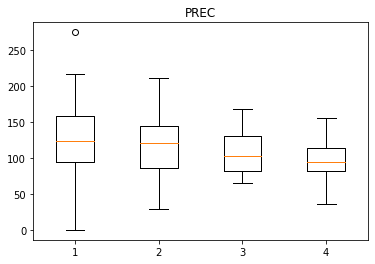

In [110]:
plt.boxplot([c1['PREC'].dropna(), c2['PREC'].dropna(), c3['PREC'].dropna(), c4['PREC'].dropna()])
plt.title('PREC')
plt.show()

In [111]:
mstats.kruskalwallis(list(c1['PREC'].dropna()), list(c2['PREC'].dropna()), list(c3['PREC'].dropna()), list(c4['PREC'].dropna()))

KruskalResult(statistic=4.139642416820706, pvalue=0.2467747259567227)

# Kraskall-Walts for months

Сначала получим данные по месяцам

In [37]:
min_temp_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')

In [65]:
monthly_temp = pd.DataFrame(min_temp_M[min_temp_M['Month'] == -5].mean(skipna=True)).T
for month in set(min_temp_M['Month']):
    if month == -5:
        continue
    monthly_temp = monthly_temp.append(pd.DataFrame(min_temp_M[min_temp_M['Month'] == month].mean(skipna=True)).T)

monthly_temp = monthly_temp.reset_index(drop=True).drop(columns=['Day', 'Week']).T

In [67]:
monthly_prec = pd.DataFrame(min_prec_M[min_prec_M['Month'] == -5].sum(skipna=True)).T
for month in set(min_prec_M['Month']):
    if month == -5:
        continue
    monthly_prec = monthly_prec.append(pd.DataFrame(min_prec_M[min_prec_M['Month'] == month].sum(skipna=True)).T)

monthly_prec = monthly_prec.reset_index(drop=True).drop(columns=['Day', 'Week']).T

In [68]:
monthly_temp.to_excel('../../output/monthly_temp.xlsx')
monthly_prec.to_excel('../../output/monthly_prec.xlsx')

Потом вручную доработаем и запихаем в файл input/MinClimateMonthly.xlsx

In [73]:
monthly_temp = pd.read_excel('../../input/MinClimateMonthly.xlsx', sheet_name='Temp')
monthly_prec = pd.read_excel('../../input/MinClimateMonthly.xlsx', sheet_name='Prec')

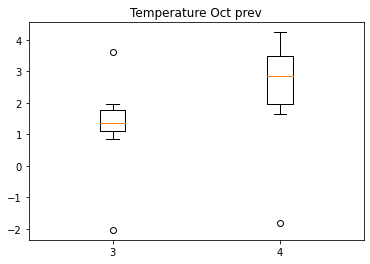

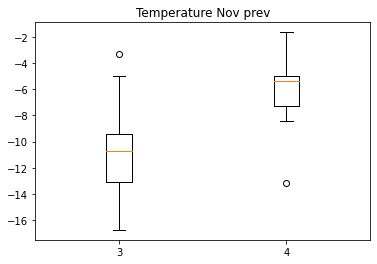

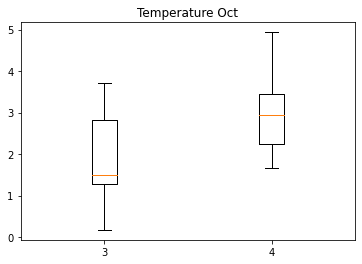

In [76]:
c1 = monthly_temp[monthly_temp['Class']==1]
c2 = monthly_temp[monthly_temp['Class']==2]
c3 = monthly_temp[monthly_temp['Class']==3]
c4 = monthly_temp[monthly_temp['Class']==4]

with open('../../output/temp_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in monthly_temp.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
        ouf.write(f"{column},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
        if kruskalwallis.pvalue < 0.05:
            #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
            #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
            plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
            plt.title("Temperature "+ column)
            plt.show()

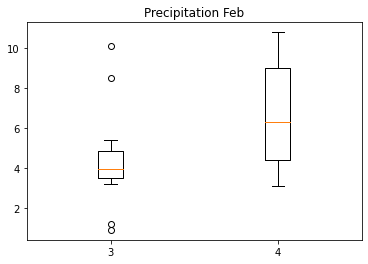

In [77]:
c1 = monthly_prec[monthly_prec['Class']==1]
c2 = monthly_prec[monthly_prec['Class']==2]
c3 = monthly_prec[monthly_prec['Class']==3]
c4 = monthly_prec[monthly_prec['Class']==4]

with open('../../output/prec_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in monthly_prec.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
        ouf.write(f"{column},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
        if kruskalwallis.pvalue < 0.05:
            #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
            #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
            plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
            plt.title("Precipitation "+ column)
            plt.show()

In [78]:
pd.read_csv('../../output/temp_monthly.csv').to_excel('../../output/temp_monthly.xlsx', index=False)
pd.read_csv('../../output/prec_monthly.csv').to_excel('../../output/prec_monthly.xlsx', index=False)

# Kraskall-Walts for weeks

In [5]:
min_temp_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')

In [157]:
mean_temp = None
sum_prec = None

for week in set(min_temp_M['Week']):

    a = min_temp_M[min_temp_M['Week'] == week].mean(skipna=True)
    a['Week'] = week
    if str(mean_temp) != 'None':
        mean_temp = mean_temp.append(pd.DataFrame(a).T)
    else:
        mean_temp = pd.DataFrame(a).T
    
    a = min_prec_M[min_prec_M['Week'] == week].sum(skipna=True)
    a['Week'] = week
    if str(sum_prec) != 'None':
        sum_prec = sum_prec.append(pd.DataFrame(a).T)
    else:
        sum_prec = pd.DataFrame(a).T

In [161]:
mean_temp = mean_temp.reset_index(drop=True).drop(columns=['Month', 'Day'])
sum_prec = sum_prec.reset_index(drop=True).drop(columns=['Month', 'Day'])

In [166]:
mean_temp.T.to_excel('../../output/mean_temp.xlsx', index=True)
sum_prec.T.to_excel('../../output/sum_prec.xlsx', index=True)

Отсюда всё руками переделал в файл input/MinClimateWeekly.xlsx

In [3]:
temp_weekly = pd.read_excel('../../input/MinClimateWeekly.xlsx', sheet_name='MEAN_TEMP')
prec_weekly = pd.read_excel('../../input/MinClimateWeekly.xlsx', sheet_name='SUM_PREC')

In [27]:
months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
    -1: 'Dec prev',
    -2: 'Nov prev',
    -3: 'Oct prev',
    -4: 'Sep prev',
    -5: 'Aug prev',
}

weeks_to_month = dict()
for week in set(min_temp_M['Week']):
    loc_df = min_temp_M[min_temp_M['Week'] == week]
    
    #weeks_to_month[week] = get_month(*get_int_diapason(loc_df['Month'].mean()))
    m = list(loc_df['Month'])
    d = list(loc_df['Day'])
    weeks_to_month[week] = f"{d[0]} {months[m[0]]},{d[-1]} {months[m[-1]]}"

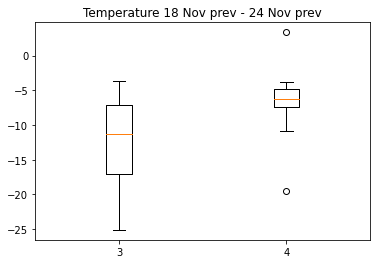

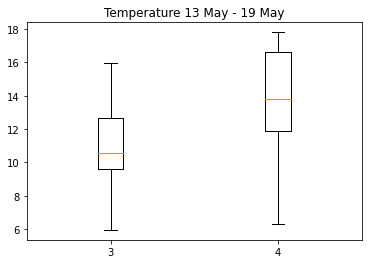

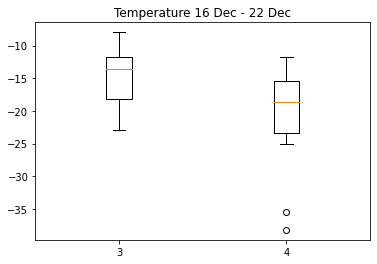

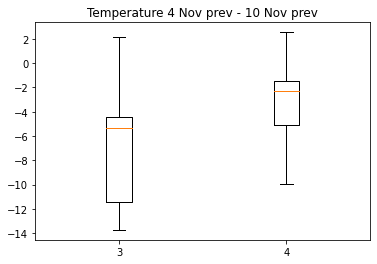

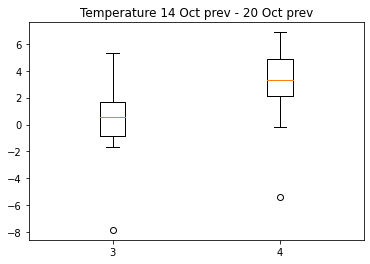

In [35]:
c1 = temp_weekly[temp_weekly['Class']==1]
c2 = temp_weekly[temp_weekly['Class']==2]
c3 = temp_weekly[temp_weekly['Class']==3]
c4 = temp_weekly[temp_weekly['Class']==4]

with open('../../output/temp_weekly.csv', 'w') as ouf:
    ouf.write('Week,StartDay,EndDay,Stat,PValue\n')
    for column in temp_weekly.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
        ouf.write(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
        if kruskalwallis.pvalue < 0.05:
            #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
            #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
            plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
            plt.title("Temperature "+' - '.join(weeks_to_month[column].split(',')))
            plt.show()

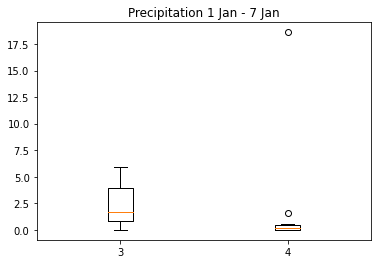

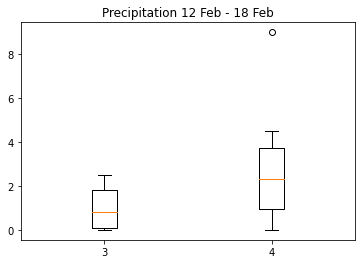

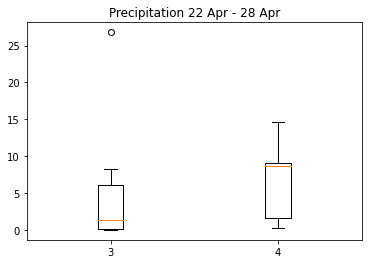

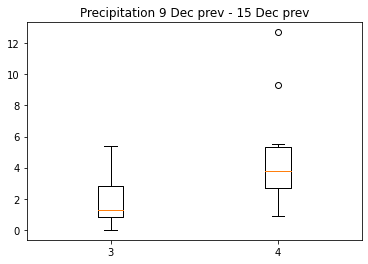

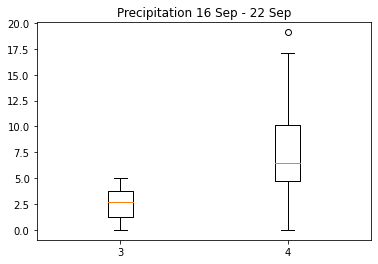

In [36]:
c1 = prec_weekly[prec_weekly['Class']==1]
c2 = prec_weekly[prec_weekly['Class']==2]
c3 = prec_weekly[prec_weekly['Class']==3]
c4 = prec_weekly[prec_weekly['Class']==4]

with open('../../output/prec_weekly.csv', 'w') as ouf:
    ouf.write('Week,StartDay,EndDay,Stat,PValue\n')
    for column in prec_weekly.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
        ouf.write(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
        if kruskalwallis.pvalue < 0.05:
            #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
            #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
            plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
            plt.title("Precipitation " +' - '.join(weeks_to_month[column].split(',')))
            plt.show()

In [34]:
pd.read_csv('../../output/temp_weekly.csv').to_excel('../../output/temp_weekly.xlsx', index=False)
pd.read_csv('../../output/prec_weekly.csv').to_excel('../../output/prec_weekly.xlsx', index=False)